Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [45]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [46]:
df = pd.read_csv('train.csv')
for idx, col in enumerate(df.columns):
    print(f"{idx}: {col} | {df[col].dtype} | {df[col].count()}")

print(df.head())

0: PassengerId | int64 | 891
1: Survived | int64 | 891
2: Pclass | int64 | 891
3: Name | object | 891
4: Sex | object | 891
5: Age | float64 | 714
6: SibSp | int64 | 891
7: Parch | int64 | 891
8: Ticket | object | 891
9: Fare | float64 | 891
10: Cabin | object | 204
11: Embarked | object | 889
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticke

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

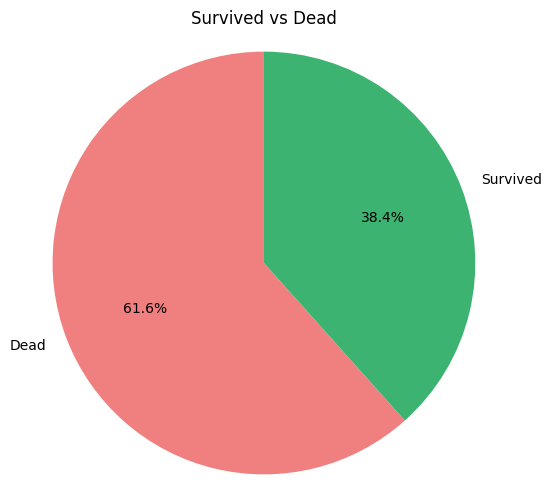

In [47]:
survival_counts = df['Survived'].value_counts()
labels = ['Dead', 'Survived']
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'mediumseagreen'])
plt.title('Survived vs Dead')
plt.axis('equal')
plt.show()

На круговій діаграмі зображено співвідношення між пасажирами, які вижили, та тими, що загинули під час катастрофи. З графіка видно, що більшість пасажирів загинули, що відповідає більшій частині діаграми (червоний сегмент — ~62%), а меншість пасажирів вижили — зелений сегмент займає приблизно ~38%.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


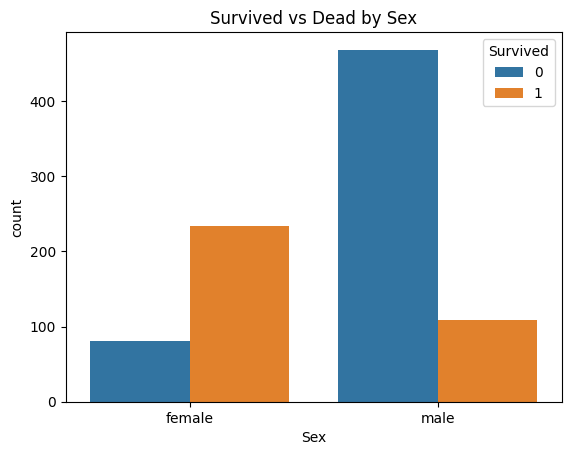

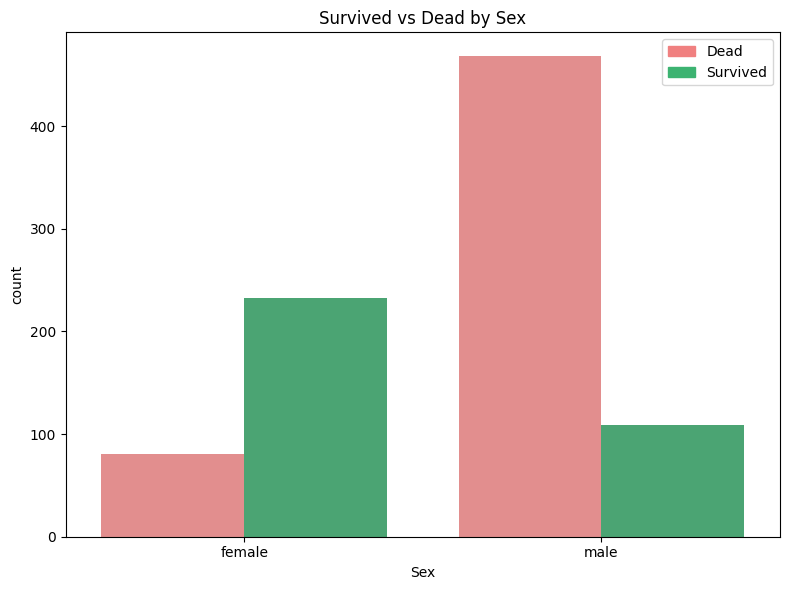

In [48]:
gender_survival = df.groupby(['Sex', 'Survived'], as_index=False).size()
gender_survival.rename(columns={'size': 'Count'}, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(data=gender_survival, x='Sex', y='Count', hue='Survived', palette=['lightcoral', 'mediumseagreen'])

plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('count')
dead_patch = mpatches.Patch(color='lightcoral', label='Dead')
survived_patch = mpatches.Patch(color='mediumseagreen', label='Survived')
plt.legend(handles=[dead_patch, survived_patch])
plt.tight_layout()
plt.show()

На графіку ми бачимо співвідношення загиблих до виживших для кожної статі. З графіка видно, що серед жінок більшість вижили, а серед чоловіків більшість загинули. Це свідчить про пріоритетну евакуацію жінок під час катастрофи.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

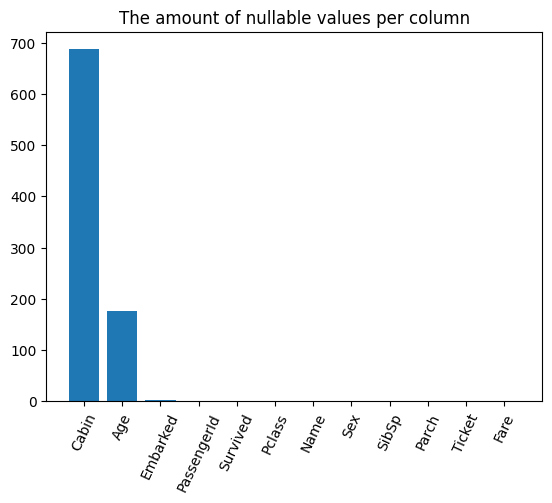

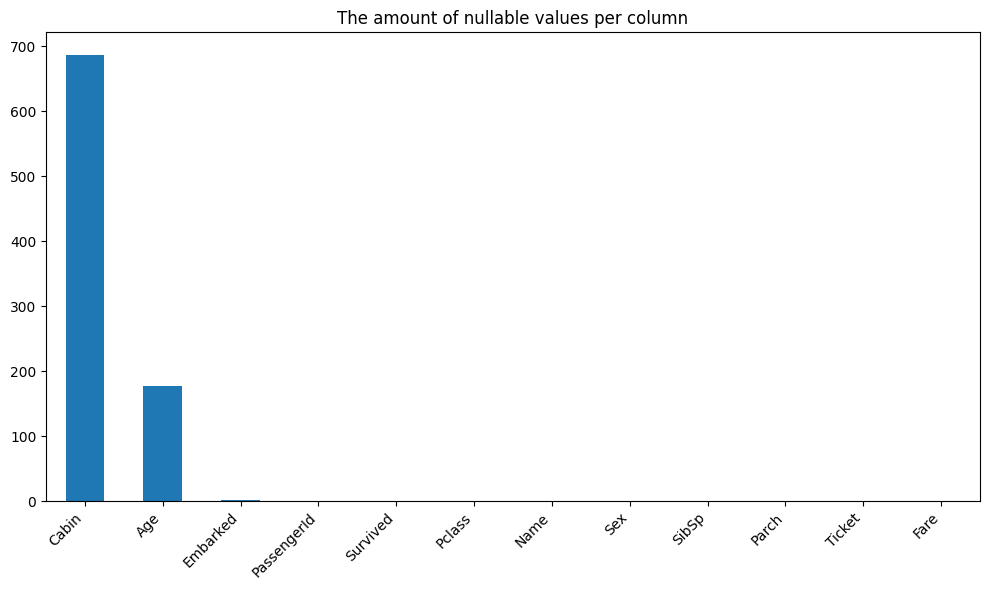

In [49]:
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.sort_values(ascending=False).plot(kind='bar')

plt.title('The amount of nullable values per column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Даний графік показує, що найбільше пропущених значень у колонках Cabin, Age та Embarked. Це важливо врахувати під час подальшої обробки даних.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

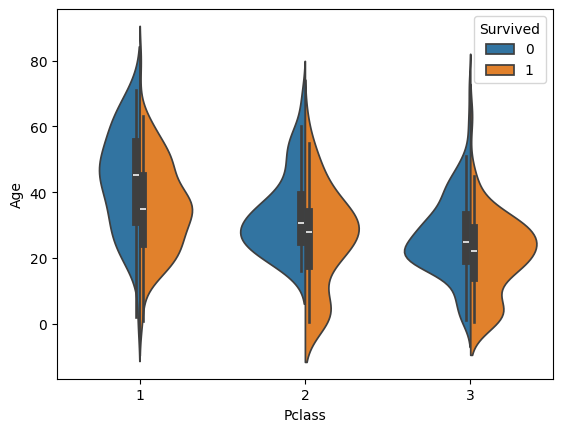

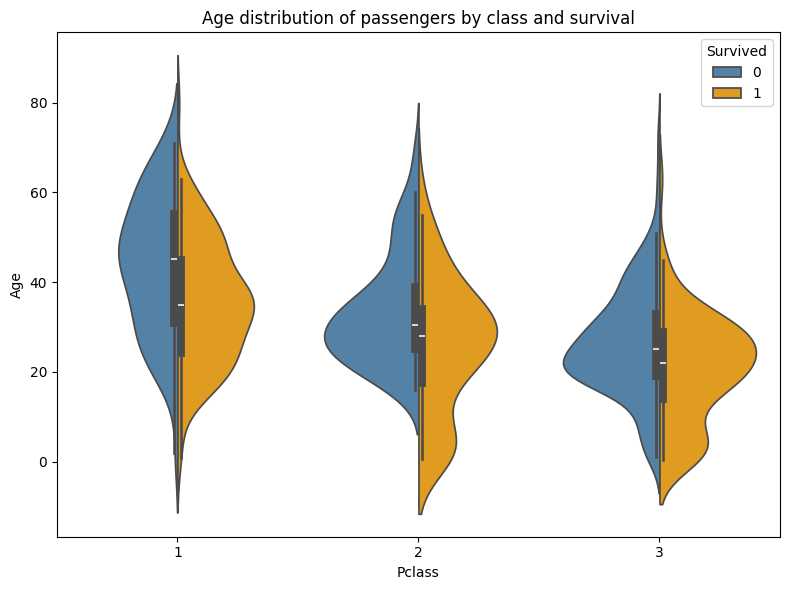

In [50]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True, palette={0: 'steelblue', 1: 'orange'})

plt.title('Age distribution of passengers by class and survival')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

Даний графік показує розподіл віку пасажирів за класами та виживанням. У 1 класі пасажири були старші, а виживання було вищим серед усіх вікових груп. У 2 класі переважно молодші пасажири, з помірною різницею між тими, хто вижив і хто загинув. У 3 класі наймолодші пасажири, але рівень виживання був найнижчим. 

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


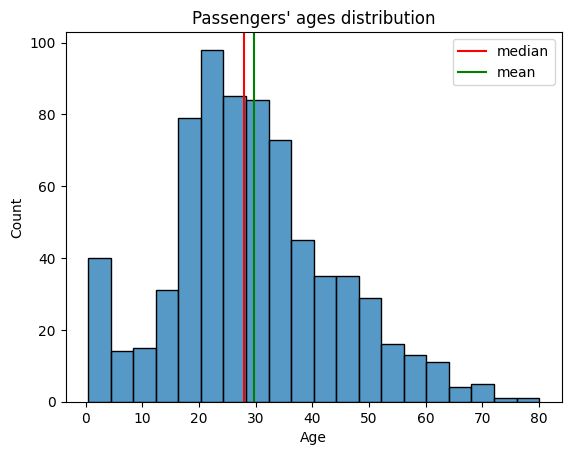

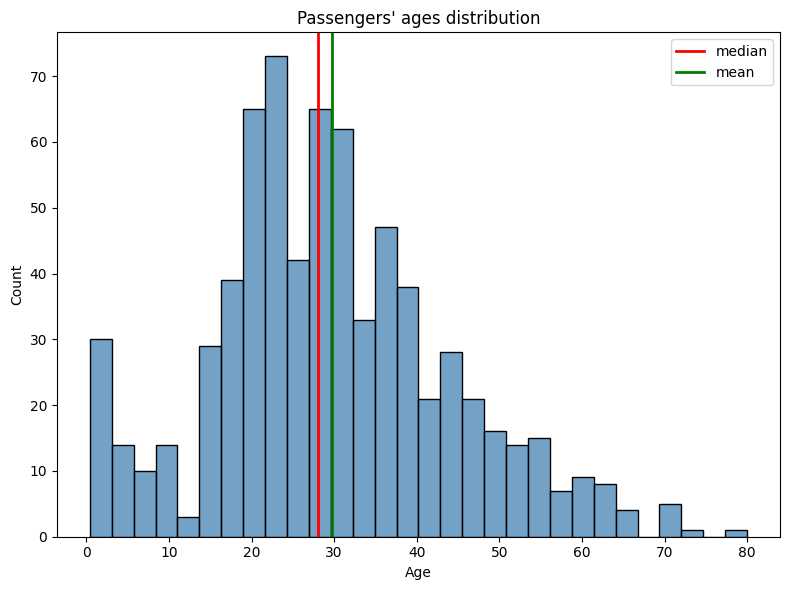

In [51]:
ages = df['Age'].dropna()

mean_age = ages.mean()
median_age = ages.median()

plt.figure(figsize=(8, 6))
sns.histplot(ages, bins=30, kde=False, color='steelblue', edgecolor='black')

plt.axvline(median_age, color='red', linestyle='-', linewidth=2, label='median')
plt.axvline(mean_age, color='green', linestyle='-', linewidth=2, label='mean')

plt.title("Passengers' ages distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

Розподіл віку пасажирів є асиметричним. Більшість пасажирів були у віці 20-30 років. Середнє значення трохи більше за медіану, що вказує на невелике зміщення вправо через старших пасажирів. 

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи впливає на виживання факт того, що пасажир подорожував з родиною або самостійно?

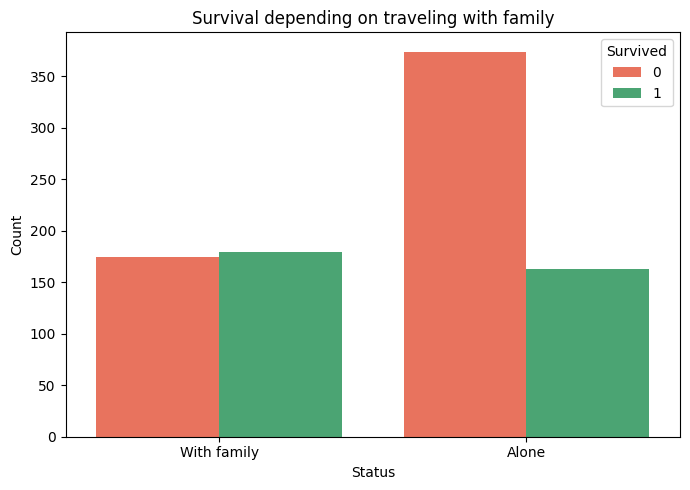

In [52]:
df['Alone'] = (df['SibSp'] + df['Parch'] == 0).astype(int)

survival_counts = df.groupby(['Alone', 'Survived']).size().reset_index(name='Count')
plt.figure(figsize=(7, 5))
sns.barplot(data=survival_counts, x='Alone', y='Count', hue='Survived', palette={0: 'tomato', 1: 'mediumseagreen'})

plt.xticks([0, 1], ['With family', 'Alone'])
plt.title('Survival depending on traveling with family')
plt.ylabel('Сount')
plt.xlabel('Status')
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

Пасажири, які подорожували з родиною, мали вищу кількість тих, хто вижив у порівняні з тими, хто подорожував самостійно. Натомість більша частина пасажирів, які подорожували самостійно, загинули. 

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

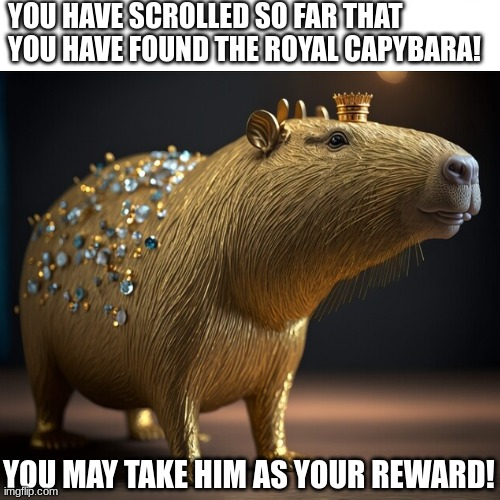